**Import Libraries**

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

**Load Stock DataSet**

In [4]:
Stock=yf.Ticker("TATASTEEL.NS")

In [5]:
Stock=Stock.history(period="max")

In [6]:
Stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,5.078839,5.097980,5.016311,5.085219,10242229,0.0,0.0
1996-01-02 00:00:00+05:30,5.078840,5.097981,4.978029,4.990789,16954313,0.0,0.0
1996-01-03 00:00:00+05:30,4.990789,5.104361,4.978028,4.992065,13514114,0.0,0.0
1996-01-04 00:00:00+05:30,4.912947,4.912947,4.721534,4.833830,34785820,0.0,0.0
1996-01-05 00:00:00+05:30,4.775130,4.798099,4.689631,4.738122,30138033,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-04 00:00:00+05:30,153.500000,159.919998,153.500000,159.559998,30064719,0.0,0.0
2025-08-05 00:00:00+05:30,159.559998,160.139999,158.279999,159.619995,14441034,0.0,0.0
2025-08-06 00:00:00+05:30,159.619995,159.800003,157.800003,158.660004,13438851,0.0,0.0


In [7]:
Stock.index

DatetimeIndex(['1996-01-01 00:00:00+05:30', '1996-01-02 00:00:00+05:30',
               '1996-01-03 00:00:00+05:30', '1996-01-04 00:00:00+05:30',
               '1996-01-05 00:00:00+05:30', '1996-01-08 00:00:00+05:30',
               '1996-01-09 00:00:00+05:30', '1996-01-10 00:00:00+05:30',
               '1996-01-11 00:00:00+05:30', '1996-01-12 00:00:00+05:30',
               ...
               '2025-07-28 00:00:00+05:30', '2025-07-29 00:00:00+05:30',
               '2025-07-30 00:00:00+05:30', '2025-07-31 00:00:00+05:30',
               '2025-08-01 00:00:00+05:30', '2025-08-04 00:00:00+05:30',
               '2025-08-05 00:00:00+05:30', '2025-08-06 00:00:00+05:30',
               '2025-08-07 00:00:00+05:30', '2025-08-08 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=7436, freq=None)

**EDA**

In [8]:
del Stock["Dividends"]
del Stock["Stock Splits"]

In [9]:
data=Stock

In [10]:
data['MA5'] = data['Close'].rolling(window=5).mean()

In [14]:
data.head()

,Open,High,Low,Close,Volume,MA5
Date,,,,,,
1996-01-05 00:00:00+05:30,4.775130,4.798099,4.689631,4.738122,30138033,4.928005
1996-01-08 00:00:00+05:30,4.708773,4.721534,4.519912,4.560747,36752157,4.823111
1996-01-09 00:00:00+05:30,4.466316,4.577336,4.466316,4.539053,36964108,4.732763
1996-01-10 00:00:00+05:30,4.539053,4.625827,4.466316,4.514807,35923053,4.637312
1996-01-11 00:00:00+05:30,4.517360,4.643693,4.502047,4.620723,27719296,4.594691


In [15]:
data.dropna(inplace=True)

In [16]:
data["Tomorrow"]=data["Close"].shift(-1)

In [17]:
data.head()

,Open,High,Low,Close,Volume,MA5,Tomorrow
Date,,,,,,,
1996-01-05 00:00:00+05:30,4.775130,4.798099,4.689631,4.738122,30138033,4.928005,4.560747
1996-01-08 00:00:00+05:30,4.708773,4.721534,4.519912,4.560747,36752157,4.823111,4.539053
1996-01-09 00:00:00+05:30,4.466316,4.577336,4.466316,4.539053,36964108,4.732763,4.514807
1996-01-10 00:00:00+05:30,4.539053,4.625827,4.466316,4.514807,35923053,4.637312,4.620723
1996-01-11 00:00:00+05:30,4.517360,4.643693,4.502047,4.620723,27719296,4.594691,4.602857


In [18]:
data = data.reset_index()  # Reset the index to make 'Date' a column
data['Date'] = pd.to_datetime(data['Date']) # Access 'Date' as a column

In [19]:
data.shape

(7432, 8)

In [20]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
MA5,0
Tomorrow,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype                       
---  ------    --------------  -----                       
 0   Date      7432 non-null   datetime64[ns, Asia/Kolkata]
 1   Open      7432 non-null   float64                     
 2   High      7432 non-null   float64                     
 3   Low       7432 non-null   float64                     
 4   Close     7432 non-null   float64                     
 5   Volume    7432 non-null   int64                       
 6   MA5       7432 non-null   float64                     
 7   Tomorrow  7431 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(6), int64(1)
memory usage: 464.6 KB


In [22]:
print(len(data))

7432


**Summary Statistics**

In [23]:
data.describe()

,Open,High,Low,Close,Volume,MA5,Tomorrow
count,7432.000000,7432.000000,7432.000000,7432.000000,7.432000e+03,7432.000000,7431.000000
mean,36.368888,36.886816,35.770502,36.306070,6.743360e+07,36.264672,36.310319
std,39.019593,39.447271,38.487656,38.950802,5.693552e+07,38.849998,38.951701
min,1.812048,1.840122,1.749520,1.786526,0.000000e+00,1.846247,1.786526
25%,5.499311,5.570772,5.409815,5.456563,3.143116e+07,5.843129,5.461666
50%,26.389223,26.777632,25.903594,26.297786,5.173761e+07,26.311598,26.301596
75%,40.989344,41.608955,40.251396,41.022487,8.422621e+07,40.796733,41.023294
max,176.064066,176.830398,174.119424,175.839325,6.428460e+08,174.414539,175.839325


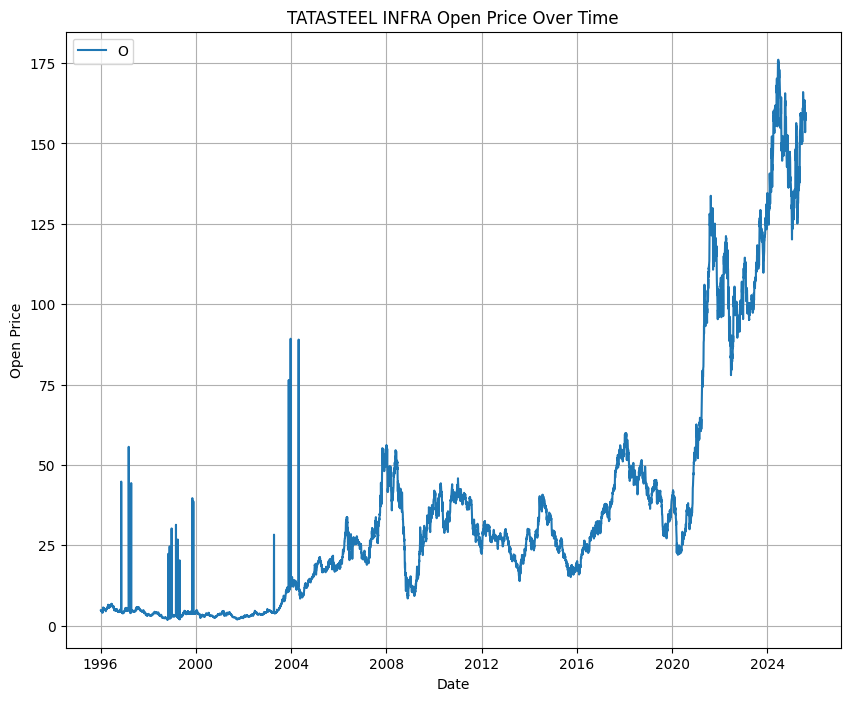

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(data['Date'], data['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend('Open')
plt.title('TATASTEEL INFRA Open Price Over Time')
plt.grid(True)
plt.show()

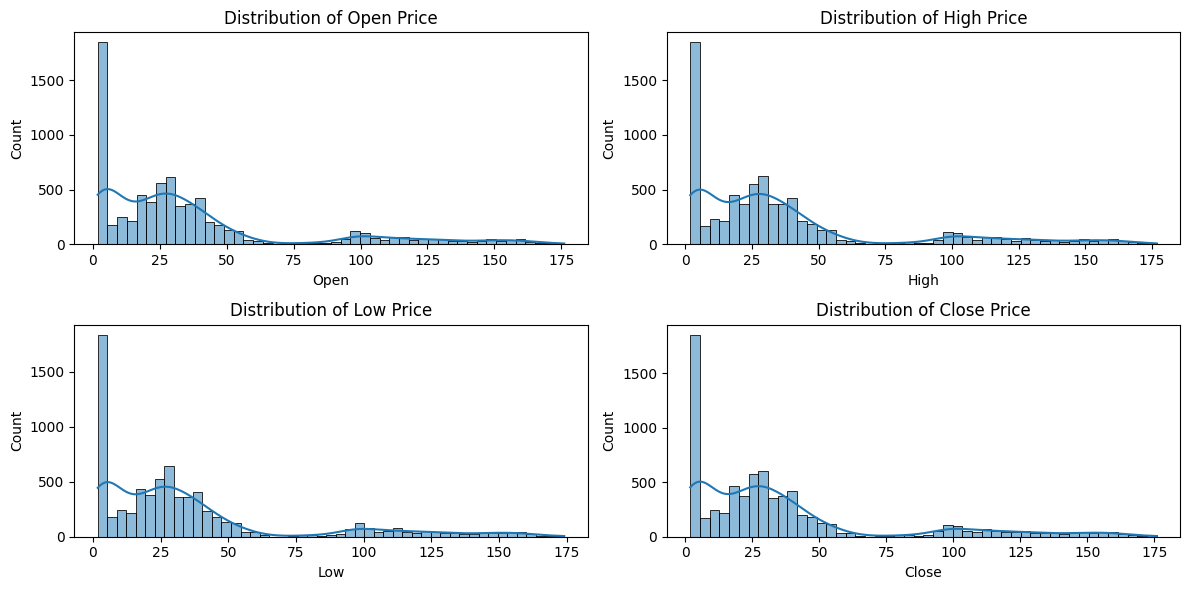

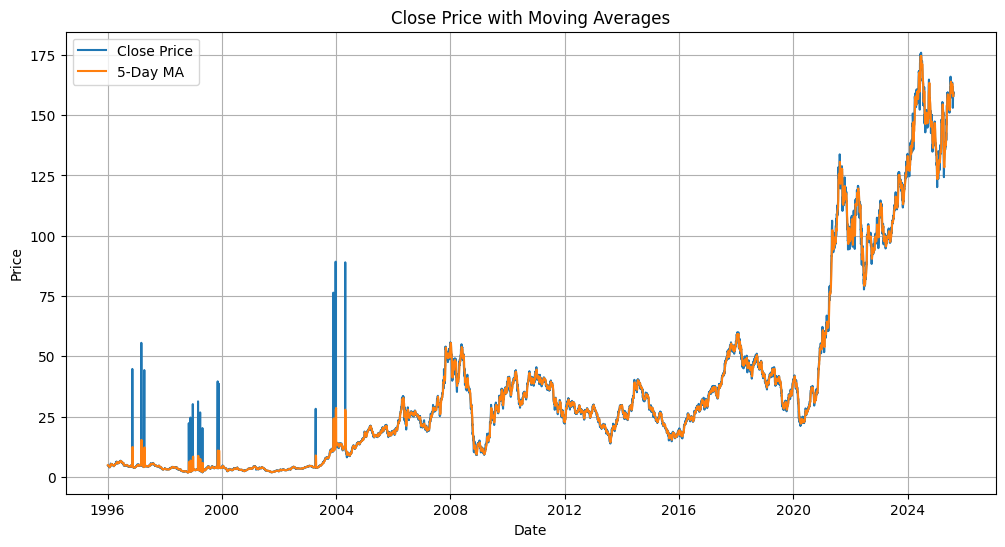

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(data['Open'], kde=True)
plt.title('Distribution of Open Price')

plt.subplot(2, 2, 2)
sns.histplot(data['High'], kde=True)
plt.title('Distribution of High Price')

plt.subplot(2, 2, 3)
sns.histplot(data['Low'], kde=True)
plt.title('Distribution of Low Price')

plt.subplot(2, 2, 4)
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Close Price')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA5'], label='5-Day MA')
# plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

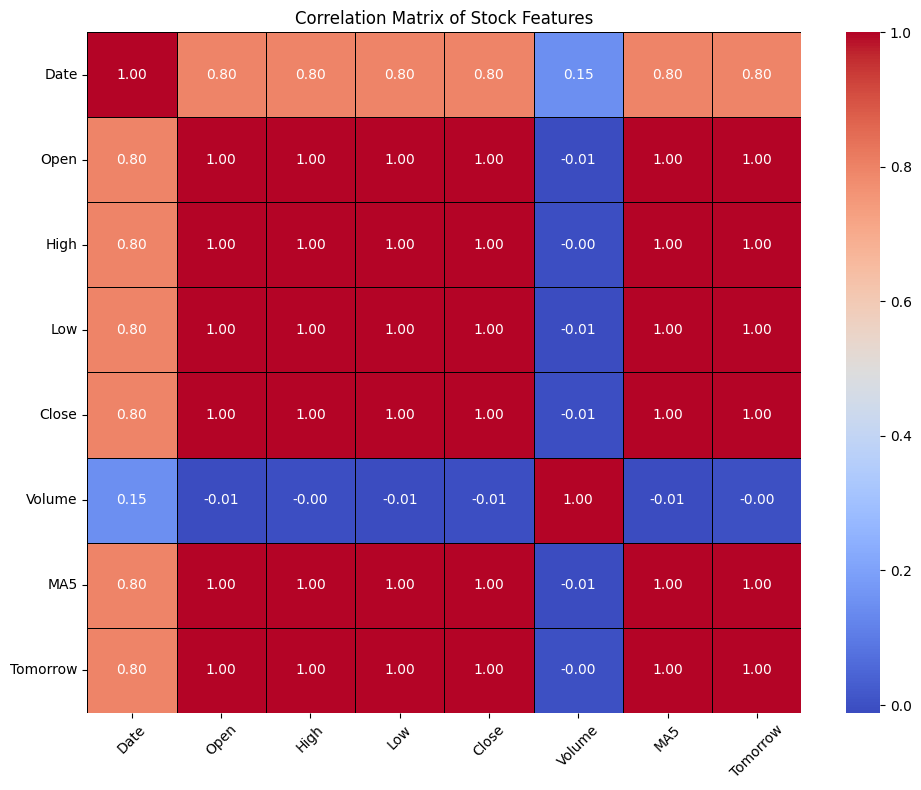

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

corr_matrix = data.corr()

plt.figure(figsize=(10,8), dpi=100)
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor="black"
)

plt.title("Correlation Matrix of Stock Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


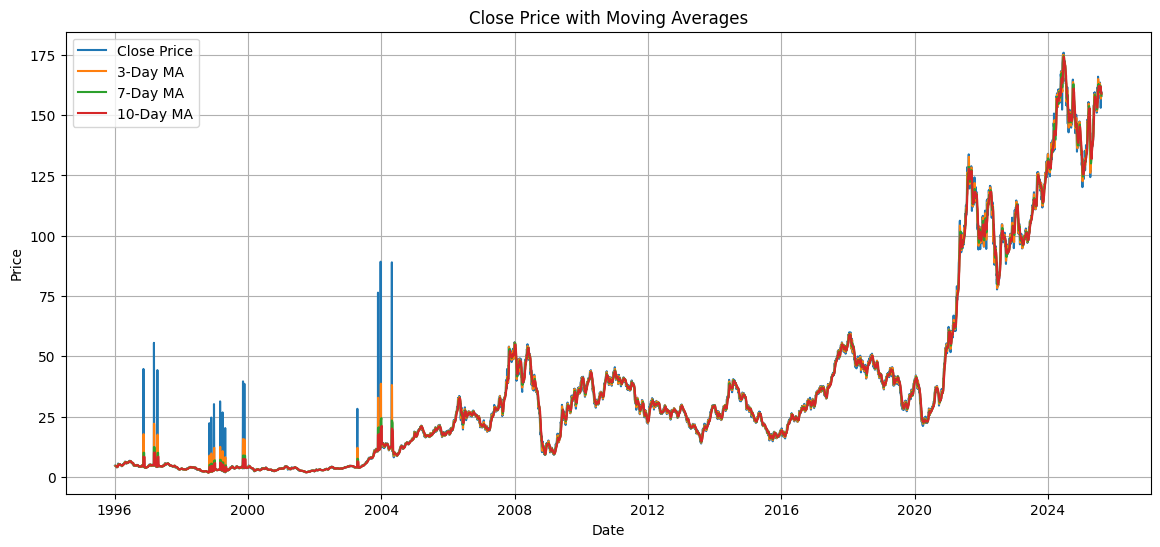

In [27]:
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
for window in [3, 7, 10]:
  data[f'MA{window}'] = data['Close'].rolling(window=window).mean()
  plt.plot(data['Date'], data[f'MA{window}'], label=f'{window}-Day MA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
!pip install mplfinance
import mplfinance as mpf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


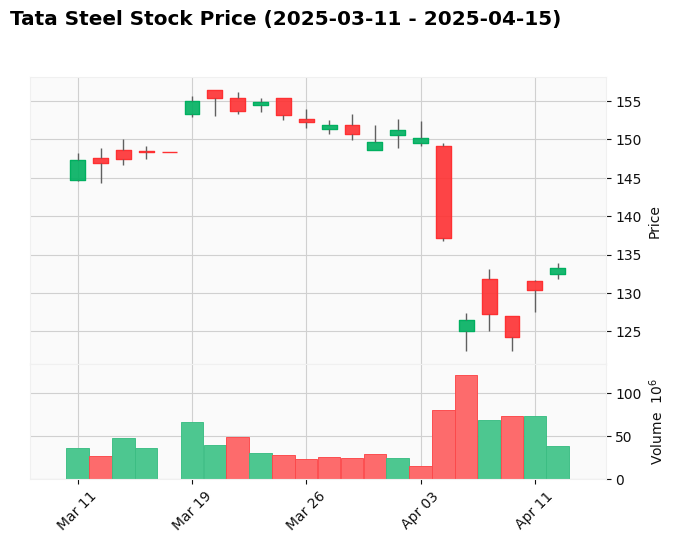

In [29]:
start_date = '2025-03-11'
end_date = '2025-04-15'

data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

mpf.plot(filtered_data, type='candle', volume=True,
         title=f'Tata Steel Stock Price ({start_date} - {end_date})',
         style='yahoo')

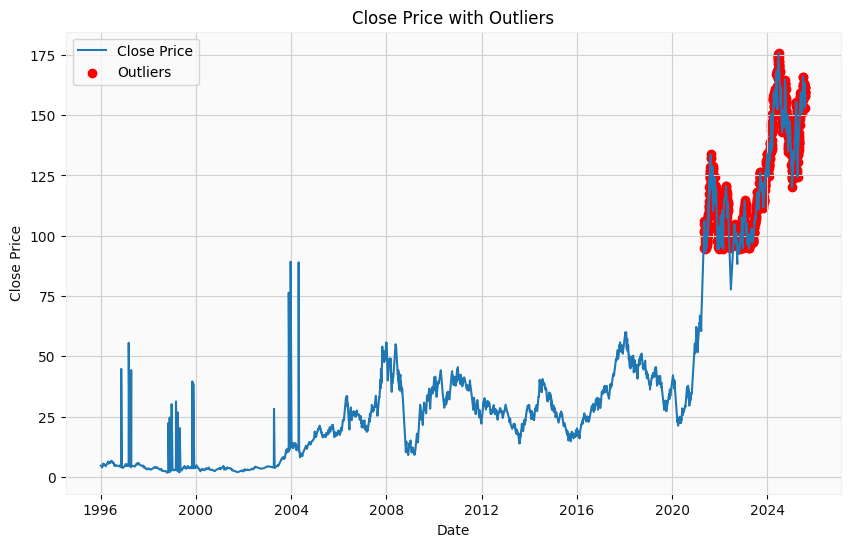

In [30]:
data_reset = data.reset_index()
Q1 = data_reset['Close'].quantile(0.25)
Q3 = data_reset['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_reset[(data_reset['Close'] < lower_bound) | (data_reset['Close'] > upper_bound)]

plt.figure(figsize=(10, 6))
plt.plot(data_reset['Date'], data_reset['Close'], label='Close Price')
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price with Outliers')
plt.legend()
plt.grid(True)
plt.show()

**Creating lag Features**

In [31]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data['RSI'] = rsi

# Calculate MACD (Moving Average Convergence Divergence)
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Bollinger Bands
data['MiddleBand'] = data['Close'].rolling(window=20).mean()
data['StdDev'] = data['Close'].rolling(window=20).std()
data['UpperBand'] = data['MiddleBand'] + (data['StdDev'] * 2)
data['LowerBand'] = data['MiddleBand'] - (data['StdDev'] * 2)

data.dropna(inplace=True)

In [32]:
!pip install ta
import ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=e47e17ddcd63111b9e509f9dcfb1322c3dff9c861ae66096f451b4b085fc2fd5
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [33]:
data['ATR'] = ta.volatility.AverageTrueRange(high=data['High'], low=data['Low'], close=data['Close']).average_true_range()
data['ADX'] = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close']).adx()
data['CCI'] = ta.trend.CCIIndicator(high=data['High'], low=data['Low'], close=data['Close']).cci()
data['ROC'] = ta.momentum.ROCIndicator(close=data['Close']).roc()
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close']).rsi()
data['William%R'] = ta.momentum.WilliamsRIndicator(high=data['High'], low=data['Low'], close=data['Close']).williams_r()
stoch = ta.momentum.StochasticOscillator(high=data['High'], low=data['Low'], close=data['Close'])
data['SO%K'] = stoch.stoch()

**Time Features**

In [34]:
data['day_of_week']=data.index.dayofweek
data['month']=data.index.month
data['year']=data.index.year

**Feature Selection**

Correlation Analysis

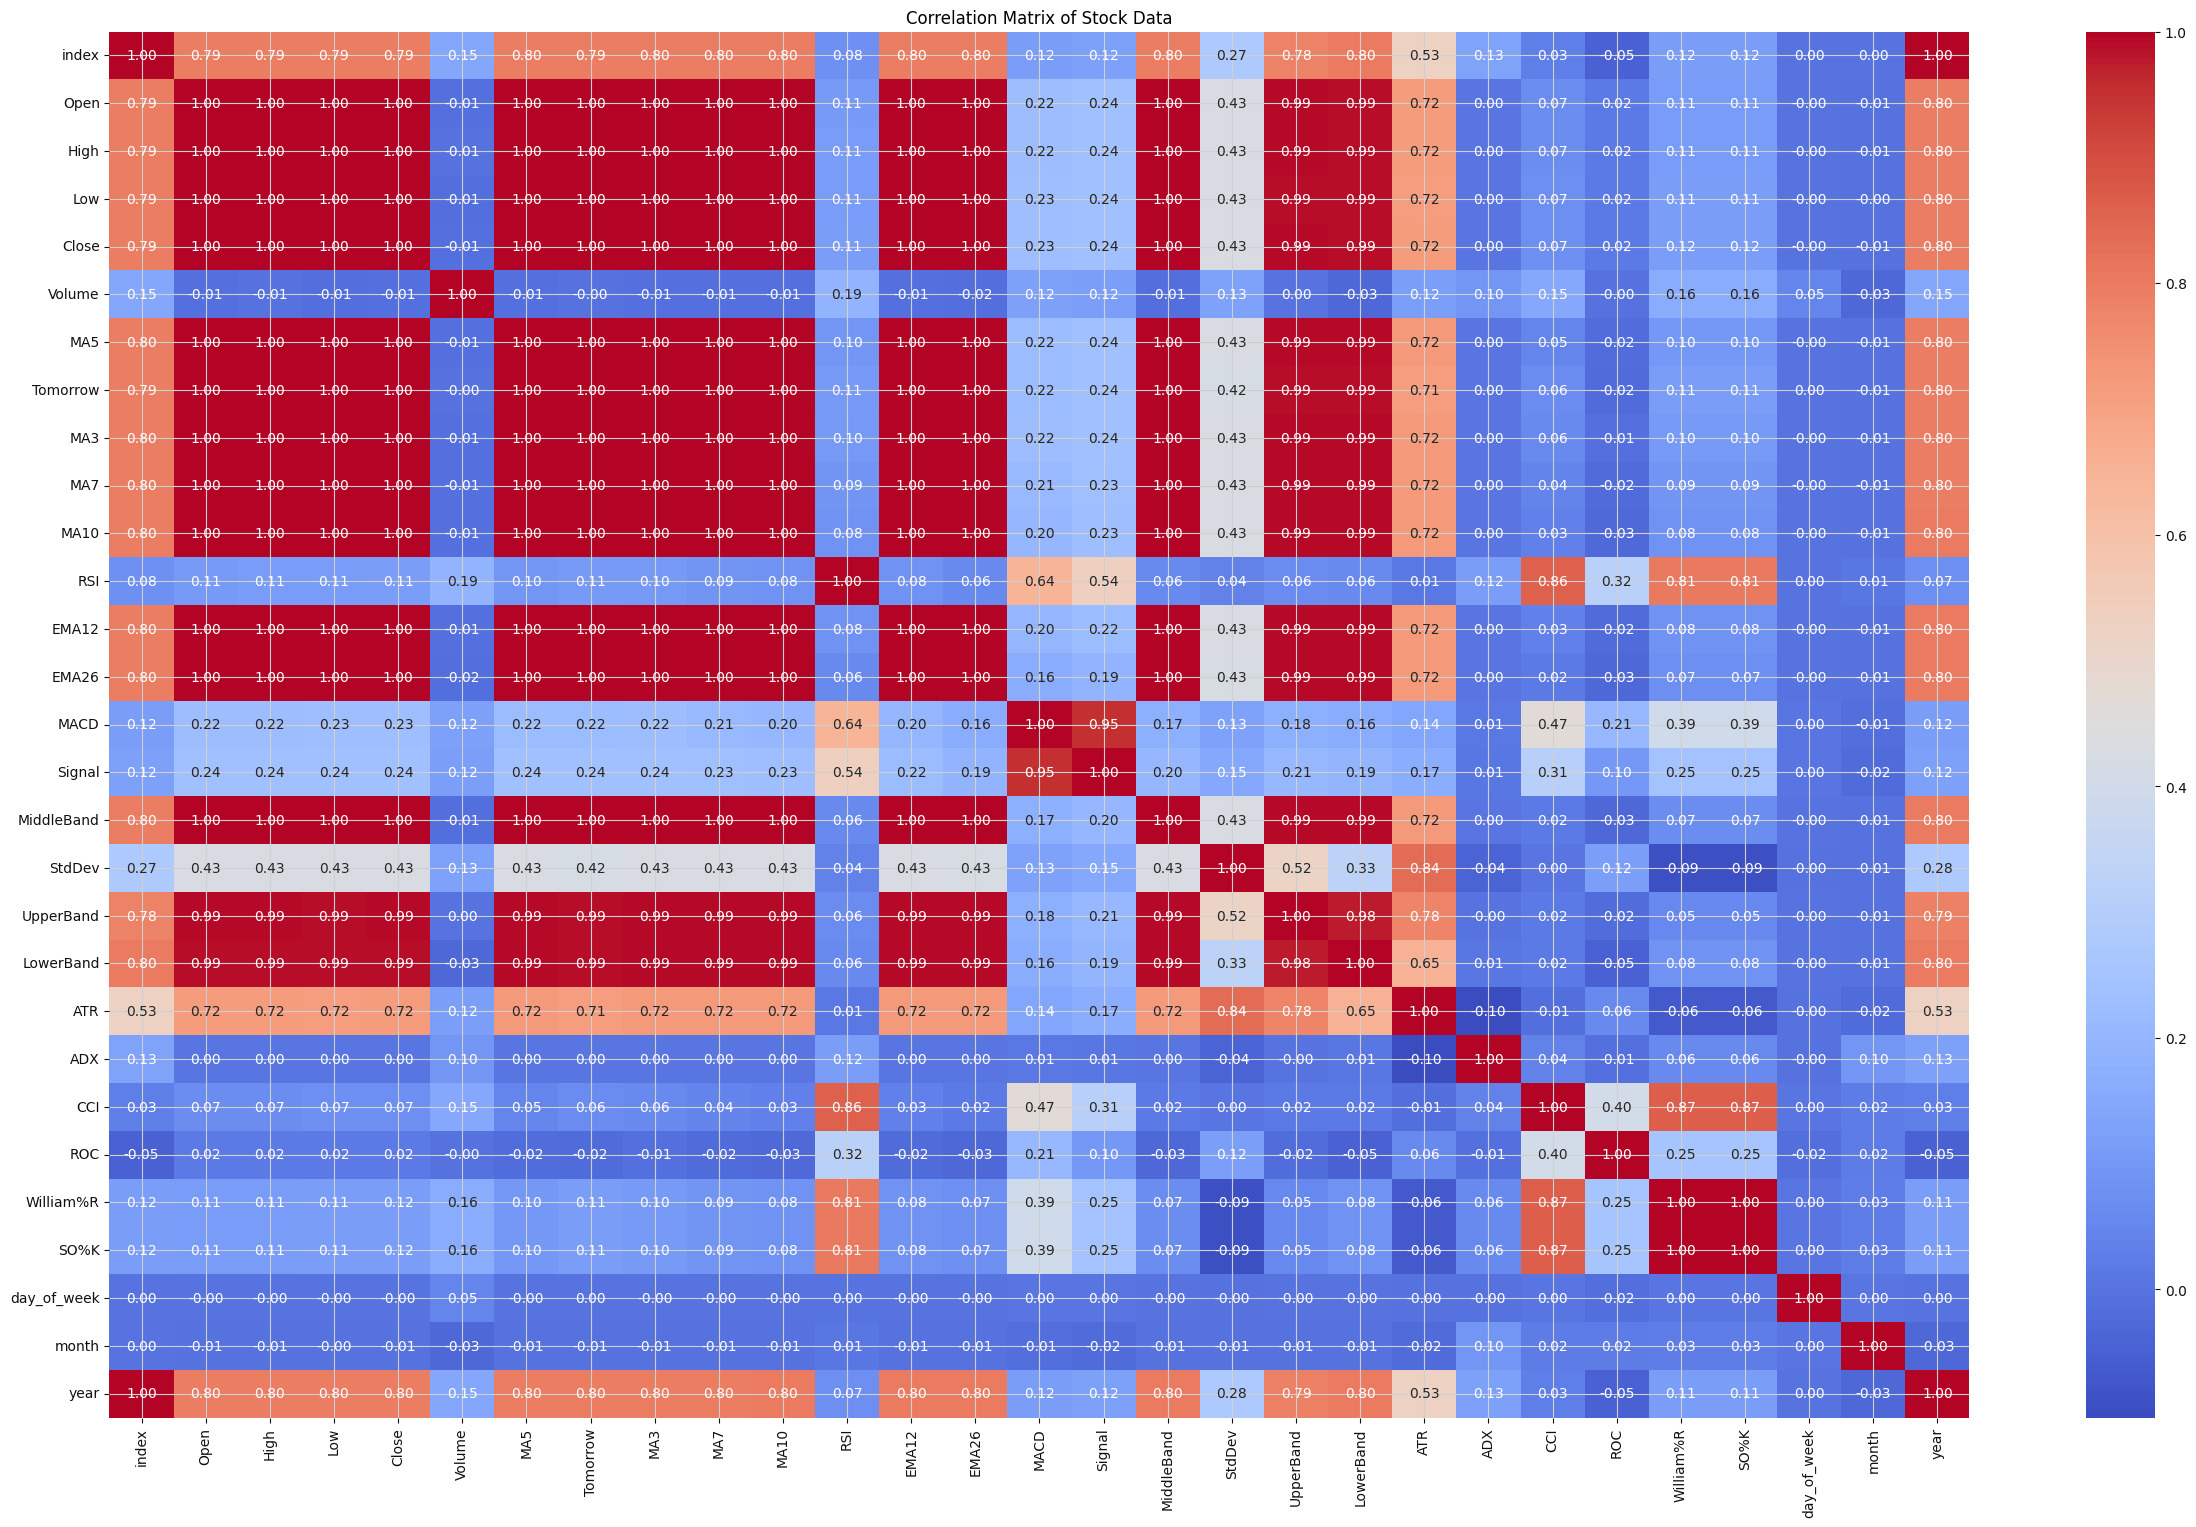

In [35]:
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Data')
plt.show()

In [36]:
import pandas as pd
import numpy as np

def select_features_by_correlation(df, target_column, threshold=0.9):
    numeric_df = df.select_dtypes(include=['number']).drop(columns=['Date'], errors='ignore')

    # Ensure 'Close_forcast' is included in numeric_df
    if target_column not in numeric_df.columns:
        raise KeyError(f"Target column '{target_column}' not found in the DataFrame or is not numerical.")

    corr_matrix = numeric_df.corr().abs()

    #Drop self-correlation
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    #  Find features with correlation > threshold
    # Exclude the target column from being dropped
    to_drop = [column for column in upper.columns if any(upper[column] > threshold) and column != target_column] # Ensure target column is not dropped

    # Drop one feature from each high correlation pair
    df_reduced = df.drop(columns=to_drop)

    #Check correlation with target and sort
    # Exclude the 'Date' column again when calculating final correlations
    final_corr = df_reduced.select_dtypes(include=['number']).drop(columns=['Date'], errors='ignore').corr()[target_column].abs().sort_values(ascending=False)

    # Return selected features (excluding target column)
    selected_features = final_corr.drop(labels=[target_column]).index.tolist()
    return selected_features
print('Selected Features:', select_features_by_correlation(data, 'Close')) # Changed 'df' to 'data' and 'Close_forcast' to 'Close'

Selected Features: ['Open', 'index', 'ATR', 'StdDev', 'MACD', 'William%R', 'RSI', 'CCI', 'ROC', 'Volume', 'month', 'ADX', 'day_of_week']


In [37]:
data.dropna(inplace=True)

In [40]:
data.head()

,index,Open,High,Low,Close,Volume,MA5,Tomorrow,MA3,MA7,...,LowerBand,ATR,ADX,CCI,ROC,William%R,SO%K,day_of_week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
1996-02-28 00:00:00+05:30,38,5.334056,5.369787,5.247282,5.258767,33926438,5.265658,4.925708,5.253238,5.212282,...,4.433307,0.273895,0.0,43.736284,-0.507035,-63.364600,36.635400,2,2,1996
1996-02-29 00:00:00+05:30,39,5.220485,5.231969,4.868284,4.925708,67024663,5.189348,4.981856,5.130733,5.190406,...,4.553613,0.282223,0.0,-41.452850,-6.853290,-92.799983,7.200017,3,2,1996
1996-03-01 00:00:00+05:30,40,4.988236,5.026519,4.889978,4.981856,56079789,5.133455,4.956335,5.055444,5.176551,...,4.605426,0.271817,0.0,-65.781900,-8.378320,-85.759973,14.240027,4,3,1996
1996-03-04 00:00:00+05:30,41,4.976752,5.023968,4.900187,4.956335,36523285,5.066078,4.956335,4.954633,5.126419,...,4.620070,0.261243,0.0,-69.988986,-7.567813,-88.959847,11.040153,0,3,1996
1996-03-05 00:00:00+05:30,42,4.956335,4.956335,4.956335,4.956335,0,5.015800,5.048213,4.964842,5.082850,...,4.749457,0.242583,0.0,-87.570886,-5.590642,-87.102636,12.897364,1,3,1996


In [60]:
X = data[['index', 'StdDev', 'MACD', 'RSI', 'William%R', 'Volume', 'CCI', 'ADX', 'ROC', 'month', 'day_of_week']]
Y = data['Tomorrow']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5175, 11), (2218, 11), (5175,), (2218,))

In [63]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'R^2': r2, 'MSE': mse, 'RMSE': rmse}
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  R^2: {metrics['R^2']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print("-" * 20)
best_model = max(results, key=lambda k: results[k]['R^2'])
print(f"Best Model: {best_model} with R^2 of {results[best_model]['R^2']:.4f}")

Model: Linear Regression
  R^2: 0.7244
  MSE: 451.0271
  RMSE: 21.2374
--------------------
Model: Ridge Regression
  R^2: 0.7244
  MSE: 451.0288
  RMSE: 21.2374
--------------------
Model: Lasso Regression
  R^2: 0.7220
  MSE: 455.0313
  RMSE: 21.3315
--------------------
Best Model: Linear Regression with R^2 of 0.7244


In [64]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [65]:
alpha_values=np.logspace(-3,2,100)
r2_val=[]
best_alpha=0
best_r_2=-1
for i in alpha_values:
  lr=Ridge(alpha=i)
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  r2=r2_score(y_test,y_pred)
  r2_val.append(r2)
  if r2>best_r_2:
    best_r_2=r2
    best_alpha=i

In [66]:
print("Best value of alpha:", best_alpha)
print("Best R² value for alpha:", best_r_2)

Best value of alpha: 0.001
Best R² value for alpha: 0.7244434444590643


In [67]:
from sklearn.linear_model import Ridge
lr=Ridge(alpha=0.001)

In [68]:
lr.fit(x_train,y_train)

Ridge(alpha=0.001)

In [69]:
print(lr.coef_)

[ 1.33926131e-02  3.99454926e+00  3.99890674e+00 -1.83075370e-01
  1.14402499e-01 -1.04525175e-07 -2.51536964e-03 -2.14184779e-01
 -4.54878162e-02  1.17654334e-02  2.80756815e-01]


In [70]:
print(lr.intercept_)

5.704305020530114


In [71]:
predicted=lr.predict(x_test)

In [72]:
predicted.shape

(2218,)

In [73]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [74]:
df

,Actual,Predicted
Date,,
2025-02-06 00:00:00+05:30,135.158035,93.335673
2023-01-30 00:00:00+05:30,111.037880,84.874498
2002-01-22 00:00:00+05:30,2.948695,4.715006
2017-07-04 00:00:00+05:30,41.359409,61.245089
2016-08-03 00:00:00+05:30,28.111914,55.825434
...,...,...
2023-07-12 00:00:00+05:30,110.016098,89.798641
2006-01-18 00:00:00+05:30,18.007637,19.621686
2000-04-27 00:00:00+05:30,2.966392,1.576658


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [76]:
n = len(x_test)
p = len(x_test.columns)
r2_test = lr.score(x_test, y_test)
adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))


print("coefficient of determination (R² score) For Test Data: {:.2f}".format(r2_test*100))
print("Adjusted R-squared (Test Data): {:.2f}".format(adjusted_r2_test*100))

print("coefficient of determination (R² score) For Training Data: {:.2f}".format(lr.score(x_train,y_train)*100))

n_train = len(x_train)
p_train = len(x_train.columns)
r2_train = lr.score(x_train, y_train)
adjusted_r2_train = (1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1)))*100
print(f"Adjusted R-squared (Training Data): {adjusted_r2_train:.2f}")

coefficient of determination (R² score) For Test Data: 72.44
Adjusted R-squared (Test Data): 72.31
coefficient of determination (R² score) For Training Data: 71.80
Adjusted R-squared (Training Data): 71.74


In [77]:
residuals = y_test - predicted
variance_of_residuals = np.sum((residuals)**2) / (len(y_test) - X.shape[1] - 1)
print(f"Variance of Residuals: {variance_of_residuals}")

Variance of Residuals: 453.48058539404


In [78]:
import math

In [79]:
print('mean absolute error:', mean_absolute_error(y_test,predicted) )

mean absolute error: 15.987693132154273


In [80]:
print('mean squared error:', mean_squared_error(y_test,predicted))

mean squared error: 451.0271286651273


In [81]:
print('root mean squared error:', math.sqrt(mean_squared_error(y_test,predicted)))

root mean squared error: 21.237399291465216


In [82]:
graph=df.tail(15)

<Axes: xlabel='Date'>

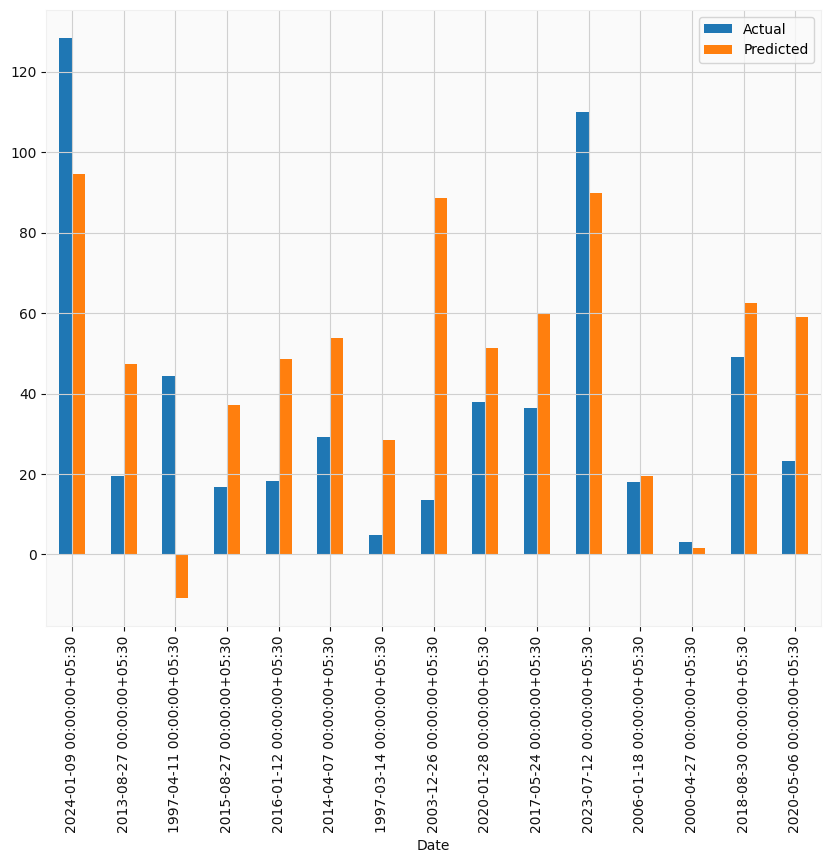

In [83]:
graph.plot(kind='bar',figsize=(10,8))

**Assumptions**

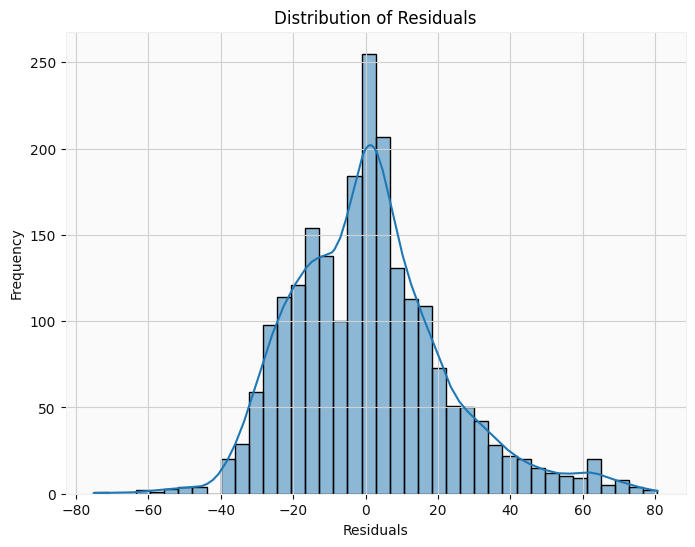

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(y_test - predicted, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

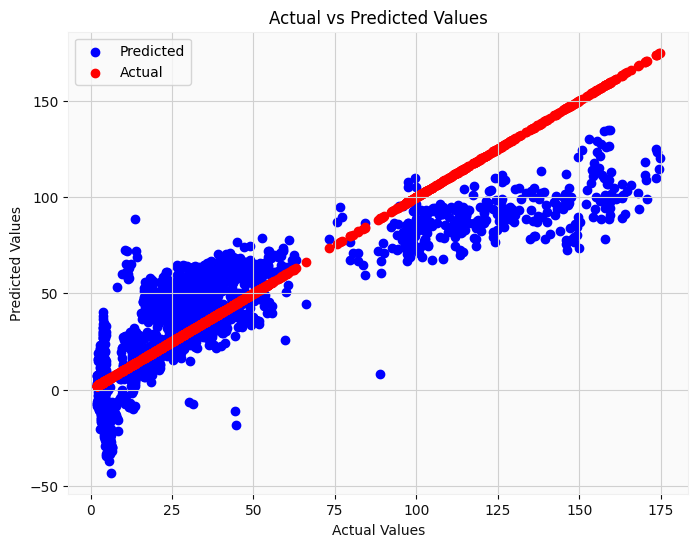

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, df['Predicted'], color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual') #Plot actual values
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [86]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
X = data[['Open', 'index', 'StdDev', 'MACD', 'RSI', 'William%R', 'Volume', 'CCI', 'ADX', 'ROC', 'month', 'day_of_week']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Open,6.795851
1,index,12.744964
2,StdDev,2.222933
3,MACD,1.505714
4,RSI,22.540176
5,William%R,11.806646
6,Volume,2.816432
7,CCI,6.552524
8,ADX,6.739207
9,ROC,1.276672


In [88]:
train_preds = lr.predict(x_train) # Predict on the training data
test_preds = lr.predict(x_test)   # Predict on the testing data

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 414.25833592923817
Test MSE: 451.0271286651273


In [90]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

tomorrow_data = pd.DataFrame({
    'index': [len(data)],
    'StdDev': [data['StdDev'].iloc[-1]],
    'MACD': [data['MACD'].iloc[-1]],
    'RSI': [data['RSI'].iloc[-1]],
    'William%R': [data['William%R'].iloc[-1]],
    'Volume': [data['Volume'].iloc[-1]],
    'CCI': [data['CCI'].iloc[-1]],
    'ADX': [data['ADX'].iloc[-1]],
    'ROC': [data['ROC'].iloc[-1]],
    'month': [data.index[-1].month],
    'day_of_week': [data.index[-1].dayofweek]
})

tomorrow_price = lr.predict(tomorrow_data)
print("Predicted closing price for tomorrow:", tomorrow_price[0])

Predicted closing price for tomorrow: 94.93858794351479
